In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [14]:
df=pd.read_csv('best-selling game consoles and their best-selling games.csv')
df

,Console,Most Sold Game,Year of Release (Game),Units Sold (in millions),Extra Information
0,PlayStation 2,Grand Theft Auto: San Andreas,2004,17.33,NaN
1,Nintendo DS,Nintendogs,2005,24.67,NaN
2,Nintendo Switch,Mario Kart 8 Deluxe,2017,52.00,NaN
3,Game Boy,Tetris,1989,35.00,NaN
4,Game Boy Color,Pokemon Gold/Silver/Crystal (1999-2000),1999,23.10,NaN
5,PlayStation 4,Grand Theft Auto V,2013,20.00,NaN
6,PlayStation,Gran Turismo,1997,10.85,NaN
7,Wii,Wii Sports,2006,82.88,NaN
8,PlayStation 3,Grand Theft Auto V,2013,21.30,NaN
9,Xbox 360,Kinect Adventures!,2010,24.00,NaN


C:\Users\kalok\AppData\Local\Temp\ipykernel_10148\117295669.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Units Sold (in millions)', y='Console', data=df, palette='viridis')


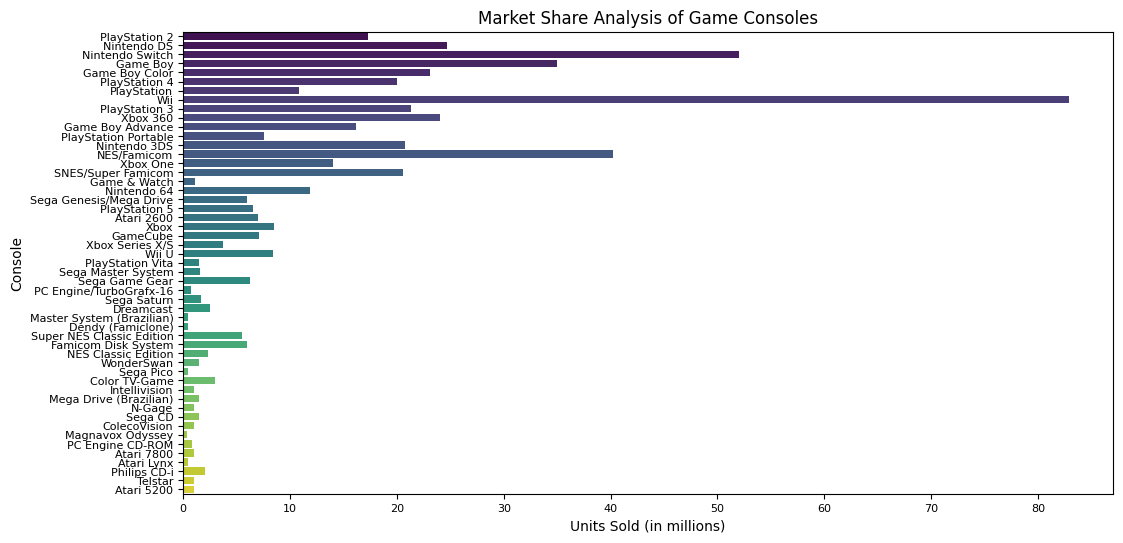

In [15]:
total_sales = df['Units Sold (in millions)'].sum()
df['Market Share (%)'] = (df['Units Sold (in millions)'] / total_sales) * 100

plt.figure(figsize=(12, 6))
sns.barplot(x='Units Sold (in millions)', y='Console', data=df, palette='viridis')
plt.title('Market Share Analysis of Game Consoles')
plt.tick_params(axis='both', labelsize=8)  
plt.xlabel('Units Sold (in millions)')
plt.ylabel('Console')
plt.show()

C:\Users\kalok\AppData\Local\Temp\ipykernel_10148\3415282907.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Units Sold (in millions)', y='Console', data=merged_df, palette='coolwarm', ci=None)
C:\Users\kalok\AppData\Local\Temp\ipykernel_10148\3415282907.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Units Sold (in millions)', y='Console', data=merged_df, palette='coolwarm', ci=None)


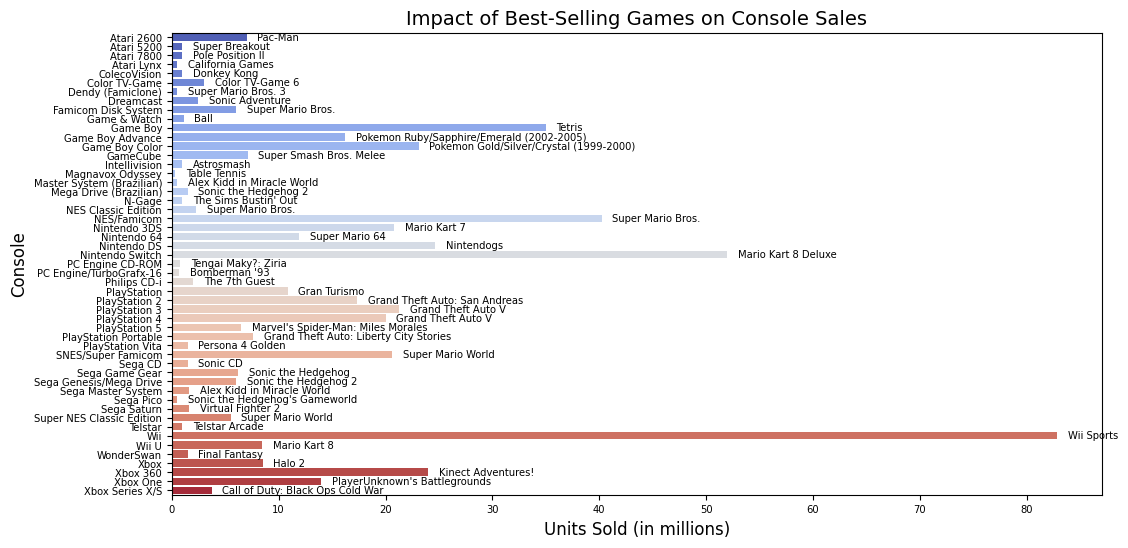

In [16]:
total_units = df.groupby('Console')['Units Sold (in millions)'].sum().reset_index()

merged_df = pd.merge(total_units, df[['Console', 'Most Sold Game']], on='Console')

plt.figure(figsize=(12, 6))
sns.barplot(x='Units Sold (in millions)', y='Console', data=merged_df, palette='coolwarm', ci=None)
plt.title('Impact of Best-Selling Games on Console Sales', fontsize=14)
plt.xlabel('Units Sold (in millions)', fontsize=12)
plt.ylabel('Console', fontsize=12)
plt.tick_params(axis='both', labelsize=7.2)


for index, row in merged_df.iterrows():
    plt.text(row['Units Sold (in millions)'] + 1, index, row['Most Sold Game'], color='black', ha="left", va="center",fontsize=7.2)

plt.show()

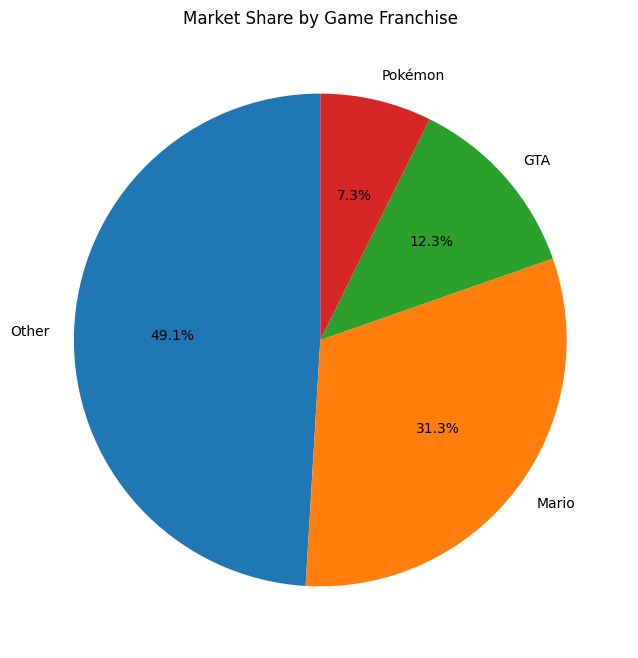

In [17]:
df['Franchise'] = df['Most Sold Game'].apply(
    lambda x: 'Mario' if 'Mario' in x else 
              'GTA' if 'Grand Theft Auto' in x else 
              'Pokémon' if 'Pokemon' in x else 
              'Other'
)

franchise_sales = df.groupby('Franchise')['Units Sold (in millions)'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 8))
plt.pie(franchise_sales, labels=franchise_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Market Share by Game Franchise')
plt.show()

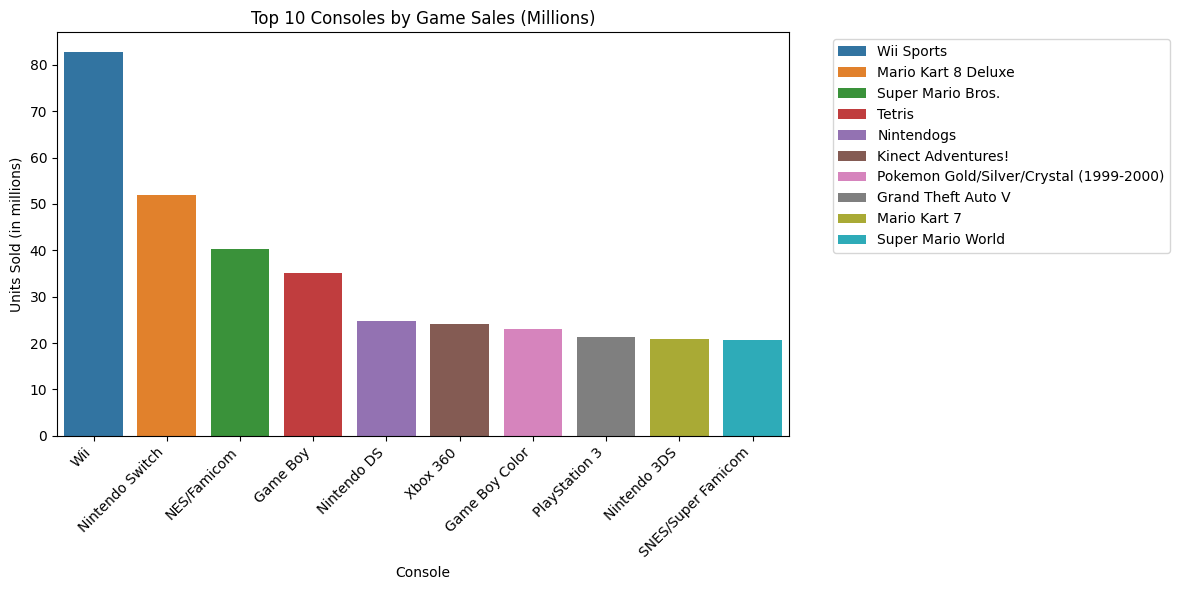

In [18]:
df['Units Sold (in millions)'] = df['Units Sold (in millions)'].astype(str).str.replace(',', '').astype(float)
df = df.sort_values('Units Sold (in millions)', ascending=False).head(10)  

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Console', y='Units Sold (in millions)', hue='Most Sold Game', dodge=False)
plt.title('Top 10 Consoles by Game Sales (Millions)')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

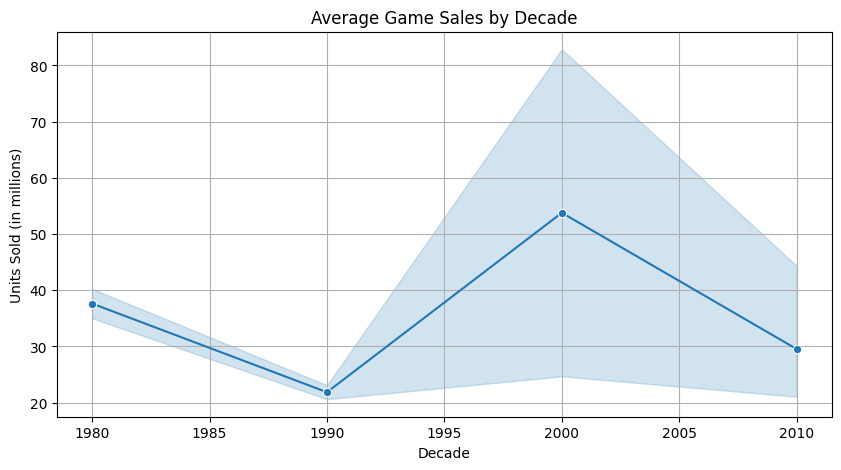

In [19]:
df['Decade'] = (df['Year of Release (Game)'] // 10) * 10

plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Decade', y='Units Sold (in millions)', estimator='mean', marker='o')
plt.title('Average Game Sales by Decade')
plt.grid(True)
plt.show()

In [26]:
df_genre=pd.read_excel('Top Games Globally.xlsx')
df_genre

,Name,Genre,E.S in thousand,G.S in Thousand,J.S in thousand,N.A.S in thousand,O.S in thousand
0,Wii Sports,Sports,29020,82740,3770,41490,8460
1,Grand Theft Auto V,Action,23040,55920,1390,23460,8030
2,Super Mario Bros.,Platform,4880,45310,6960,32480,990
3,Tetris,Puzzle,2950,35840,6030,26170,690
4,Mario Kart Wii,Racing,12880,35820,3790,15850,3310
...,...,...,...,...,...,...,...
11492,Agarest Senki: Re-appearance,Role-Playing,0,10,10,0,0
11493,Act of Aggression,Strategy,10,10,0,0,0
11494,Aa Megami-samaa,Adventure,0,10,10,0,0
11495,15 Days,Adventure,10,10,0,0,0


In [28]:
max_action=df_genre[df_genre['Genre']=='Action']['Name'].sort_values(ascending=False)[:5]
max_sport=df_genre[df_genre['Genre']=='Sports']['Name'].sort_values(ascending=False)[:5]
max_shooter=df_genre[df_genre['Genre']=='Shooter']['Name'].sort_values(ascending=False)[:5]


Text(0, 0.5, 'No.people')

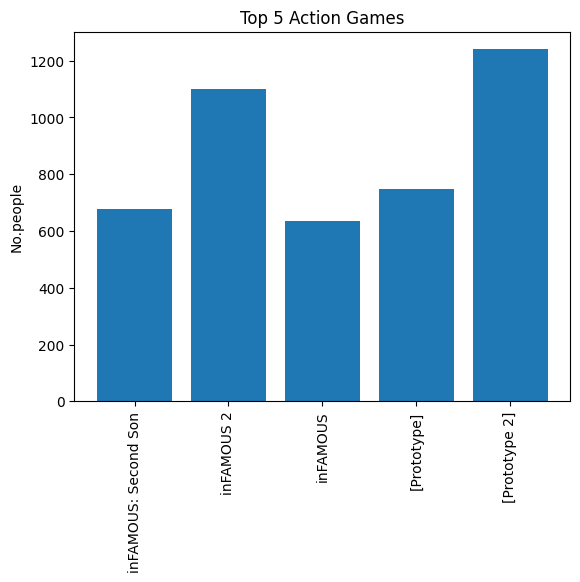

In [29]:
plt.bar(max_action.values,max_action.index)
plt.xticks(rotation=90)
plt.title('Top 5 Action Games')
plt.ylabel('No.people')

Text(0, 0.5, 'No.people')

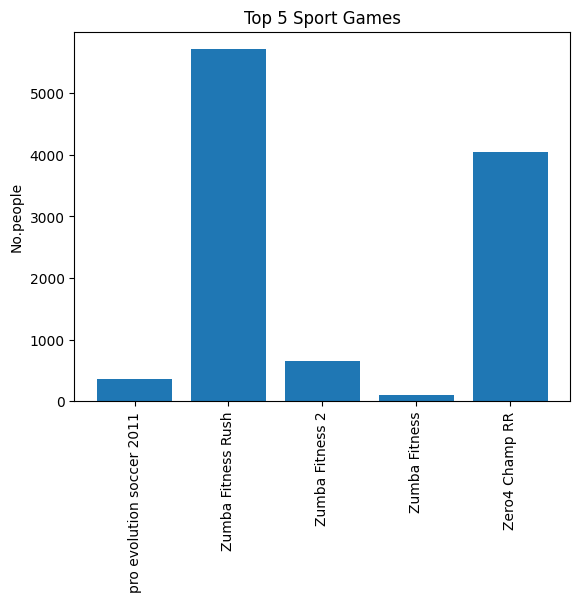

In [23]:
plt.bar(max_sport.values,max_sport.index)
plt.xticks(rotation=90)
plt.title('Top 5 Sport Games')
plt.ylabel('No.people')

Text(0, 0.5, 'No.people')

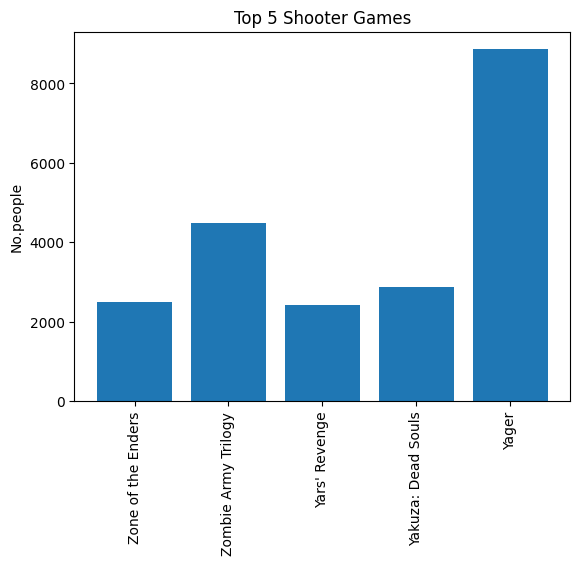

In [24]:
plt.bar(max_shooter.values,max_shooter.index)
plt.xticks(rotation=90)
plt.title('Top 5 Shooter Games')
plt.ylabel('No.people')